In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
#데이터 불러오기
df=pd.read_csv("D:/인공지능개론/AAME.csv")
open_values=df[['Open']] #Open 컬럼만 사용하기

In [7]:
#정규화
scaler=MinMaxScaler()
scaled=scaler.fit_transform(open_values)

In [5]:
#슬라이딩 윈도우
def make_sample(data, window):
    X, y=[], []
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE=30
TEST_SIZE=2000
train_data=scaled[:-TEST_SIZE]
test_data=scaled[-(TEST_SIZE+WINDOW_SIZE):]

In [8]:
X_train, y_train=make_sample(train_data, WINDOW_SIZE)
X_test, y_test=make_sample(test_data, WINDOW_SIZE)

In [11]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(WINDOW_SIZE, 1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
history=model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0879
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0049
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0045
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0041
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040
Epoch 8/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040
Epoch 9/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037
Epoch 10/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0034
Epoch 11/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037
Epoch 12/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040
Epoch 13/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0031
Epoch 14/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035
Epoch 15/100
253/253 ━━━━━━━━

In [15]:
pred=model.predict(X_test)
predicted=scaler.inverse_transform(pred)
actual=scaler.inverse_transform(y_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


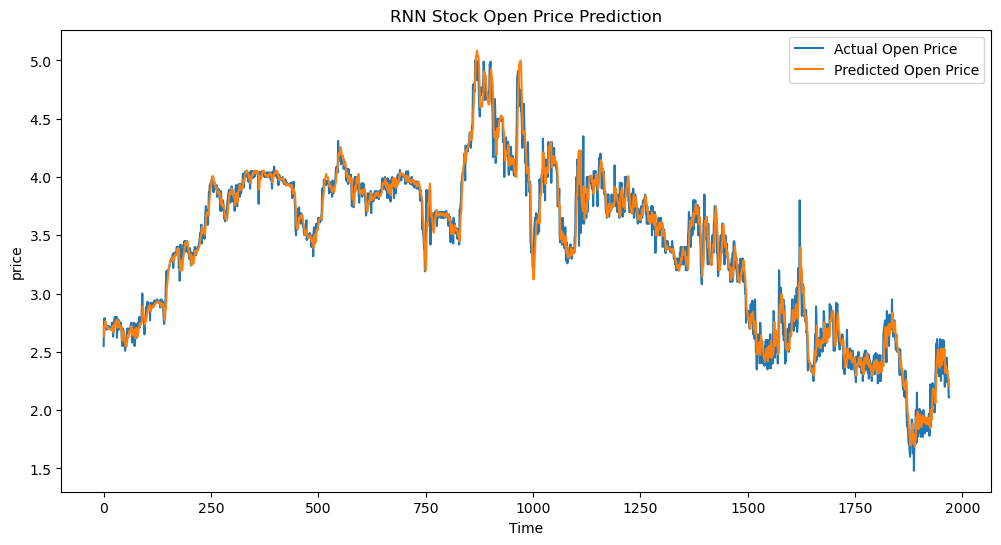

In [17]:
#시각화
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Open Price')
plt.plot(predicted, label='Predicted Open Price')
plt.legend()
plt.title("RNN Stock Open Price Prediction")
plt.xlabel("Time")
plt.ylabel("price")
plt.show()